In [1]:
import numpy as np
import joblib
from sklearn.metrics import r2_score ,mean_squared_error
import pandas as pd

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 讀取資料

In [2]:
data = joblib.load('../data/dataset.pkl')
b = data['output']
batch_size = b.shape[0]
A = data['action'].reshape(batch_size,-1)

# 切分資料

In [3]:
sp = 100000
A_train = A[:sp]
b_train = b[:sp]
A_test = A[sp:]
b_test = b[sp:]

# 用lstsq方法找到權重w

In [4]:
from numpy.linalg import inv 

w = inv(A_train.T@A_train)@A_train.T@b_train

w.shape

(396, 1)

# 評估

In [5]:
y_pred = A_train@w
y_real = b_train
score = pd.DataFrame(index = ['train'],columns = ['R2','MSE','MAPE'])
score['R2'] = r2_score(y_real,y_pred)
score['MSE'] = mean_squared_error(y_real,y_pred)
score['MAPE'] = mape(y_real,y_pred)
score

,R2,MSE,MAPE
train,0.949804,0.000718,2.751881


In [6]:
y_pred = A_test@w
y_real = b_test
score2 = pd.DataFrame(index = ['test'],columns = ['R2','MSE','MAPE'])
score2['R2'] = r2_score(y_real,y_pred)
score2['MSE'] = mean_squared_error(y_real,y_pred)
score2['MAPE'] = mape(y_real,y_pred)
score2

,R2,MSE,MAPE
test,0.901499,0.001583,5.878625


In [7]:
score.append(score2)

,R2,MSE,MAPE
train,0.949804,0.000718,2.751881
test,0.901499,0.001583,5.878625


# 檢查權重

In [8]:
s = np.linalg.lstsq(A_train,b_train,rcond=-1)[0]
s = s.reshape(36,11)

In [9]:
corr = abs(pd.DataFrame(s,columns=data['action_col']))
corr.style.background_gradient(axis=1)

,MLPAP_FQ-0619.PV,MLPAP_TJC-0627.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_TJC-0757A.PV,MLPAP_PIC-0761.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_TRC-0747.PV,MLPAP_TJ-0757B.PV,濃度
0,4.438546,0.304746,0.188875,4.743946,0.122288,0.206900,0.047048,0.026134,0.075429,0.819322,6.362655
1,0.387439,0.374863,0.141554,0.446111,0.268853,0.093020,0.009734,0.021344,0.164677,0.705216,0.927472
2,5.459063,0.219650,0.084232,4.093482,0.133775,0.484445,0.000632,0.011322,0.081981,0.462553,5.229302
3,2.819406,0.134374,0.049999,1.991694,0.122441,0.044638,0.009613,0.006640,0.076589,0.268348,2.393162
4,4.038894,0.035708,0.009588,3.025150,0.055228,0.159813,0.001012,0.003745,0.013675,0.055956,3.986017
5,2.093089,0.022473,0.001539,1.533673,0.034627,0.004775,0.000460,0.002920,0.029764,0.278844,1.917627
6,0.255563,0.004782,0.007029,0.078032,0.120728,0.063297,0.013730,0.005345,0.037327,0.056596,0.192606
7,1.171165,0.017307,0.005851,0.867824,0.071229,0.034134,0.003440,0.003271,0.023022,0.062700,1.457449
8,1.645539,0.024039,0.000165,1.658903,0.027528,0.021870,0.015690,0.005202,0.059768,0.133294,1.904880
9,0.895084,0.012989,0.018317,0.854700,0.046003,0.115047,0.003094,0.001338,0.086625,0.000109,1.017347


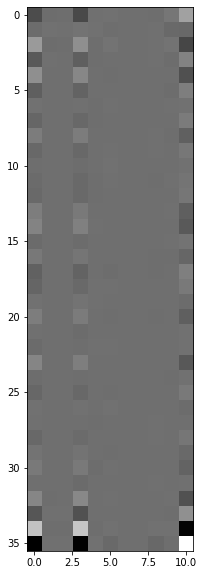

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(s,cmap='gray')